<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> SPAM mail's Classification Using- NLP(Natural language Processing)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Data Dictionary 
 
 The Data set contains 5572 observations of emails who keep in different folders.It is again most intresting to find how Spam and Ham affect our live, How we can change the proxey wrld by devoloping such ML Concepts, also it is so intresting to step a head towards the AI.


## About the dataset (Spam- ham dataset) 

**Category :** Identity of the folder as Spam or Ham.

**Message :** Text (Message) in present in those selectoins.

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - **[Read the Data](#read)**
    - **[Check the Data Type](#dtype)**
    - **[Data PreProcessing](#dp)**
    
3. **[EDA with Actions](#q1)**
4. **[Model Building](#fe)**
5. **[Evaluation of the Model](#result)**

<a id="lib"></a>
# Import Libraries

In [1]:
# Load all required libraries
import pandas as pd # to work with relational or labeled data
pd.options.display.max_rows = None # To display maximum number of rows on screen

# to perform a wide variety of mathematical operations on arrays.
import numpy as np 

# to get insight from text extraction, word embedding, named entity recognition, parts of speech tagging, and text classification.
import flair
from flair.data import Sentence

# To provides full support for Perl-like regular expressions
import re

# Natural language Toolkit
# for text tokenization, stemming, stop word removal, classification, clustering, PoS tagging, parsing, and semantic reasoning. 
# It also provides wrappers for other NLP libraries.
import nltk
from nltk.corpus import stopwords

# To representing text data in which the size of each word indicates its frequency
from wordcloud import WordCloud

# For data visualization and graphical plotting
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# To duralize the randum occurances
import random as rn

# To count the elements in the text(Message)
from collections import Counter

# adds support for opening, manipulating, and saving many different image file formats
from PIL import Image

<a id="prep"></a>
# Data Preparation

In [2]:
# load the csv file
# store the data in 'mail_data'
mail_data = pd.read_csv("SPAM text message Data.csv")

# It is always a good practice to make copy of main dataframe
mail_data_copy = mail_data

# display first five observations using head()
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Let us now see the number of variables and observations in the data.**

In [3]:
# use 'shape' to check the dimension of data
mail_data.shape

(5572, 2)

**Interpretation:** The data has `5572` observations and `2` variables.

<a id="dtype"></a>
## Check the Data Type

In [4]:
mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Interpretation:**

- We have Two Features in clude `Category` and `Message` both have the same data type `object`.

**Action**

- We are Doing here Language Processing so we need to operate on text so here we need to change the data type to text support that is `string`.

In [5]:
# change the Data type
mail_data.Message = mail_data.Message.astype('str')

<a id="dp"></a>
# Data PreProcessing

## Null value Treatment

In [7]:
# Check for Null vales
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

**So as we see here we don't have any null values in the dataset**

<a id="q1"></a>
# EDA (Exploretrive data Analysis)

## Visualisation of given Features

### feature -1 Category    

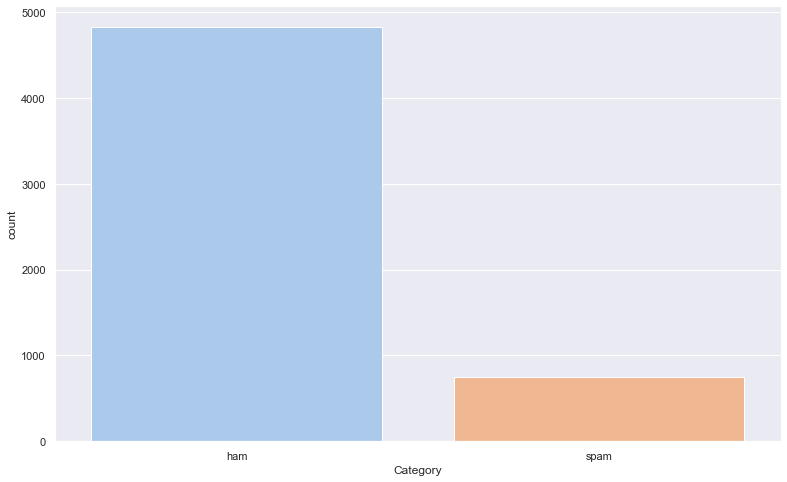

In [23]:
# Visualise the first feature
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(13,8)})
sns.set_palette("pastel")
sns.countplot(x='Category',data=mail_data)
plt.show()

In [18]:
mail_data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Feature -2 Message

Message is the feature iclude text, we can't cansideer it as catagorical feature. so what next?

**WordCloud of Our text of our Emails**

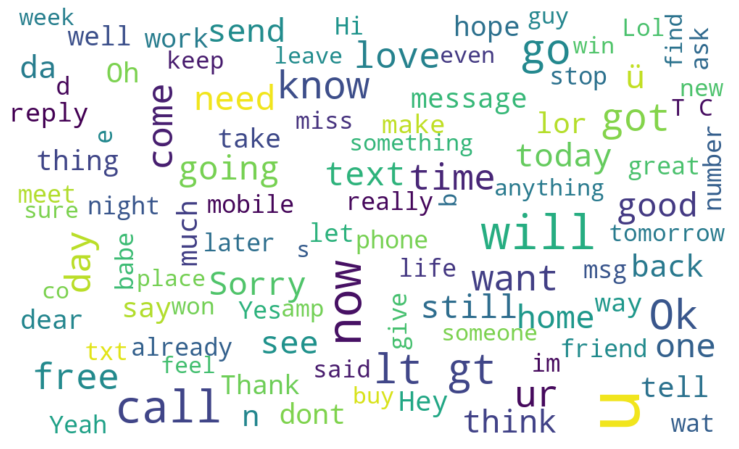

In [22]:
# We can see that there are more ham (non-spam emails) than spam emails.
# 3.2. WordCloud of Our Emails

txt = ' '.join(rev for rev in mail_data.Message)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Interpretation:**

After the EDA I conclude that we have only two data points, `Spam` an `Ham` with Higher Ham messages and Lesser Spam messages.

**Action**

As we see here in `message` feature, we need to clean the text, so let's clean the text.

In [24]:
# Process to clean the text
# I use here a functions. because i am comfertable with those

# Duplicate Values Removing

mail_data = mail_data.drop_duplicates(keep='first')

In [25]:
# We make a function to clean some basic characters

def clean(raw):
#     """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [26]:
# We make function to remove numeric

def remove_num(texts):
    output = re.sub(r'\d+', '', texts)
    return output

In [27]:
# We make function to remove emoji

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [28]:
# We make function to unify whitespaces

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [29]:
# We make function to remove punctuation

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [31]:
# We make function to remove stopwords
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
    text=[word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Then we combine all the cleaning functions

def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)

In [34]:
# Apply the function on main dataset

cleaning(mail_data,'Message')

In [36]:
mail_data[['Message']].head()

,Message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think goes usf lives around though


## Again Visualise the text data and observe the changes

In [37]:
# Apply WordCloud of Ham and Spam Emails

ham = mail_data[mail_data['Category']=='ham']
spam = mail_data[mail_data['Category']=='spam']

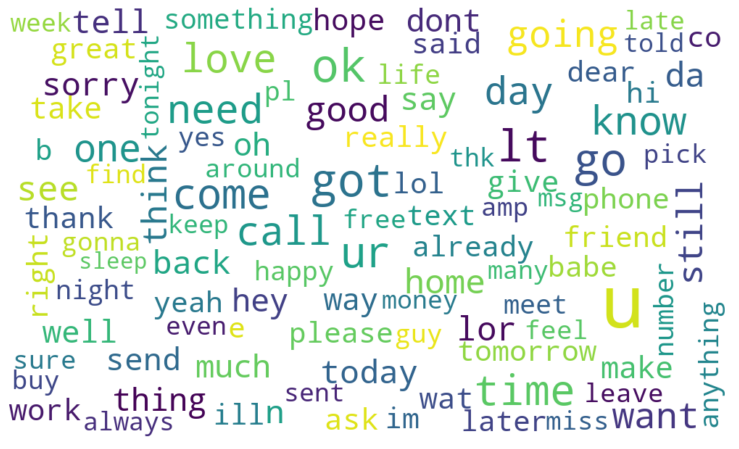

In [38]:
# Ham Emails

txt = ' '.join(rev for rev in ham.Message)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

We can see that for ham (non-spam) emails, the most common words are 'will', 'call', 'going', 'love' ,'u' etc as shown in picture above. They are just normal words from normal conversation between someones who know each other. Nothing's suspicious.

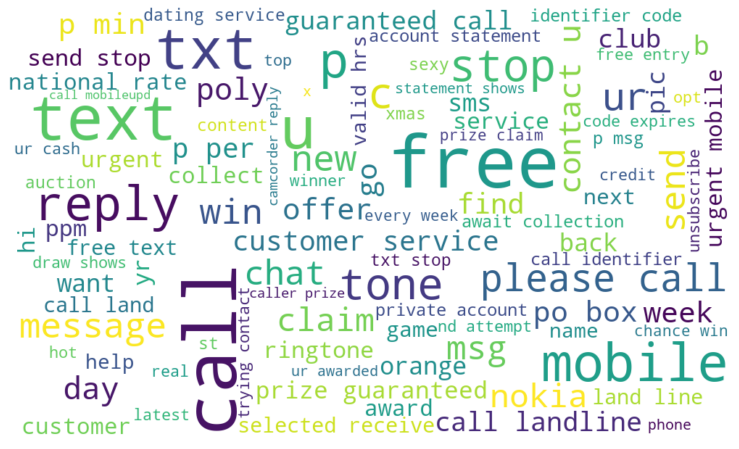

In [39]:
# Spam Emails

txt = ' '.join(rev for rev in spam.Message)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

And we can see that for spam emails, the most common words are 'Free', 'mobile', 'Call', 'Service', etc as shown in picture above. It seems that most of them are words from ads that offer product or services.

In [40]:
# Distribution of Number of Email Words
# First we create additional features to count number of words in each email

df_vis = mail_data.copy()

In [41]:
df_vis['Num_word_email'] = df_vis['Message'].apply(lambda x:len(str(x).split()))

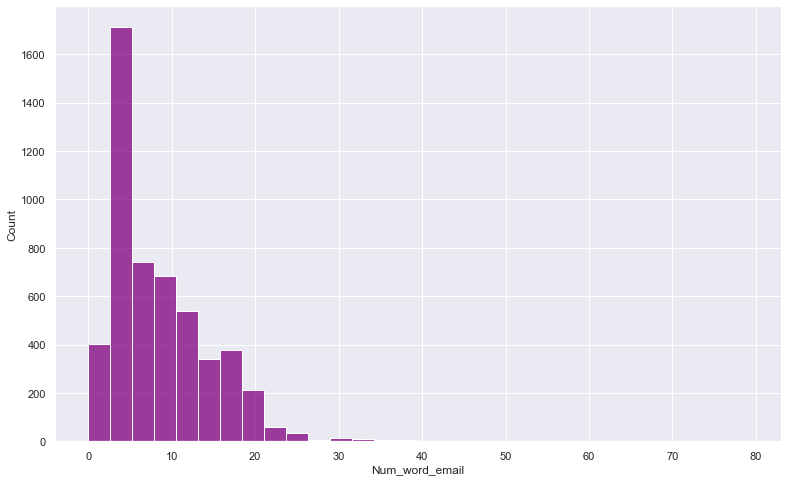

In [44]:
# Than we can plot them

sns.histplot(data=df_vis, x="Num_word_email",bins=30,color='purple')
plt.show()

In [45]:
# As we can see that most of our emails contain 1-50 words.

df_vis['temp_list'] = df_vis['Message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,u,1062
1,call,488
2,get,366
3,ur,321
4,lt,287
5,go,274
6,ok,252
7,free,246
8,know,240
9,got,233


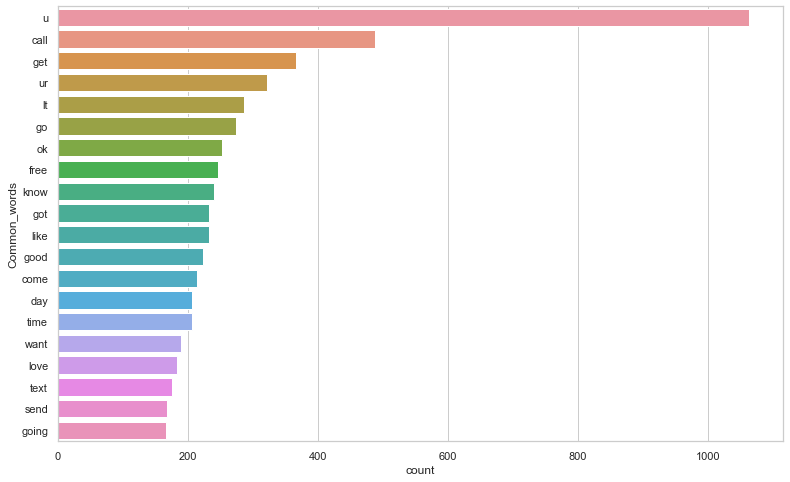

In [46]:
# We can plot them

sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)
plt.show()

<a id="fe"></a>
# Model Building

## Random forest
### Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification.

In [47]:
# # Then We can see that the word "u" , "call" , "go" are the top 3 common words in our email texts.

# Creating Bag of Words and Text Classifier Model
#  Creating pipeline for tokenizing and modelling
# Here i use count vectorizer for tokenizing and random forest as classifier model.¶

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english",max_features=3000)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
    ])

In [49]:
mail_data.Category = mail_data.Category.replace({'ham':1,'spam':0})

In [51]:
X = mail_data['Message']
y = mail_data['Category']

In [52]:
# Model Training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 40,test_size = 0.20)

In [53]:
text_classifier = clf.fit(X_train,y_train)

In [54]:
predictions = text_classifier.predict(X_test)

In [55]:
np.unique(predictions)

array([0, 1], dtype=int64)

<a id="result"></a>
# Evaluation of the Model

In [56]:
#  Model's Performance

# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, roc_auc_score
confusion_matrix(y_test,predictions)

array([[111,  27],
       [  2, 892]], dtype=int64)

In [57]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, ypred)))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,ypred)))

In [58]:
Confusion_Matrix(y_test,predictions)

TN - True Negative 111
FP - False Positive 27
FN - False Negative 2
TP - True Positive 892
Accuracy Rate: 0.9718992248062015
F1-Score: 0.9840044125758411
Misclassification Rate: 0.02810077519379845
ROC-AUC 0.9010553448108161


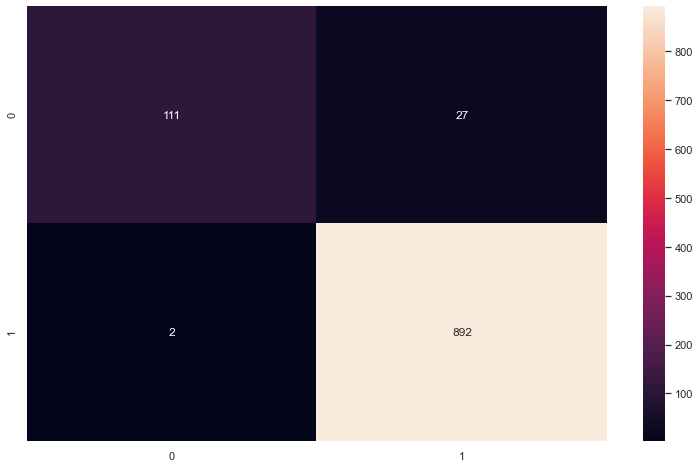

In [59]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='')
plt.show()

We see from above confusion matrix that our model has accuracy of 97.1 % and F1-Score of 0.98. It is pretty good. We also have ROC-AUC score of 0.98 where 0.5< our AUC Score <1. So there is a high chance that the our text classifier model will be able to distinguish the ham email class values from the spam email class values.

**It's End!!!! Nop because this is a part of an great data revolution soo, I am Learning................***